In [126]:
from google.colab import drive
drive.mount('/content/drive')

#실행시간 15분정도

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy
import matplotlib.gridspec as gridspec
import glob
from datetime import datetime, time
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from io import open

In [128]:
%cd /content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv/csv파일

#csv디렉토리

/content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv/csv파일


In [129]:
diag=pd.read_table('diagnoses_icd.csv', sep=',')
diag
pat=pd.read_table('patients.csv', sep=',')
pat
admi=pd.read_table('admissions.csv', sep=',')
admi
icd9_10=pd.read_table('ICD9_to_icd10.csv', sep=',')
icd9_10

%cd /content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv
#내 작업디렉토리

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,11603789,25552978,3,65801,9
1,11603789,25552978,4,64881,9
2,11603789,25552978,5,V270,9
3,11603789,25552978,1,65221,9
4,11603789,25552978,2,64421,9
...,...,...,...,...,...
4677919,13747041,25594844,10,N189,10
4677920,13747041,25594844,5,N179,10
4677921,13747041,25594844,6,R531,10
4677922,13747041,25594844,1,T50901A,10


,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10002723,F,0,2128,2017 - 2019,NaN
1,10003939,M,0,2184,2008 - 2010,NaN
2,10004222,M,0,2161,2014 - 2016,NaN
3,10005325,F,0,2154,2011 - 2013,NaN
4,10007338,F,0,2153,2017 - 2019,NaN
...,...,...,...,...,...,...
383215,19998203,M,29,2132,2011 - 2013,NaN
383216,19998350,M,52,2127,2011 - 2013,NaN
383217,19999068,M,63,2161,2011 - 2013,NaN
383218,19999270,M,33,2184,2014 - 2016,NaN


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
0,12427812,21593330,2184-01-06 11:51:00,2184-01-10 11:45:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,NaN,UNKNOWN,NaN,NaN,0
1,14029832,22059088,2120-01-18 01:28:00,2120-01-20 16:13:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,NaN,OTHER,NaN,NaN,0
2,14495017,22484010,2175-01-28 15:41:00,2175-01-29 16:00:00,NaN,DIRECT EMER.,PHYSICIAN REFERRAL,HOME,Other,?,NaN,WHITE,NaN,NaN,0
3,13676048,23865469,2193-01-19 05:27:00,2193-01-24 18:59:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,?,MARRIED,WHITE,NaN,NaN,0
4,13831972,27763544,2131-01-27 04:03:00,2131-01-27 05:39:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicaid,ENGLISH,SINGLE,WHITE,2131-01-26 22:19:00,2131-01-27 05:39:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524515,17892964,20786062,2180-09-17 00:00:00,2180-09-18 13:37:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,SINGLE,WHITE,NaN,NaN,0
524516,17137572,20943099,2147-08-01 17:41:00,2147-08-02 17:30:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,DIVORCED,HISPANIC/LATINO,2147-07-31 23:55:00,2147-08-01 19:37:00,0
524517,19389857,23176714,2189-03-01 00:58:00,2189-03-02 15:22:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0
524518,12298845,22347500,2138-05-31 00:00:00,2138-06-04 16:50:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0


,icd9cm,icd10cm
0,10,A000
1,11,A001
2,19,A009
3,20,A0100
4,21,A011
...,...,...
23907,V9129,O30299
23908,V9190,O30809
23909,V9191,O30819
23910,V9192,O30829


/content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv


In [130]:
# icd9_10[icd9_10['icd9cm'] == '65801']

In [131]:
# 확인을 해보자 
diag['icd_code']=diag['icd_code'].str.strip()
a = diag[diag['icd_version'] == 9]
a
icd9_10_dupR=icd9_10.drop_duplicates(subset='icd9cm')
icd9_10
icd9_10_dupR
# diag
pd.merge(a,icd9_10_dupR, left_on ='icd_code', right_on='icd9cm')

# icd가 9인친구들 
# icd9_10 9cm인 애들 merge를하면 없다..

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,11603789,25552978,3,65801,9
1,11603789,25552978,4,64881,9
2,11603789,25552978,5,V270,9
3,11603789,25552978,1,65221,9
4,11603789,25552978,2,64421,9
...,...,...,...,...,...
2523464,14396614,29918558,5,7242,9
2523466,14396614,29918558,6,V4987,9
2523467,14396614,29918558,1,78659,9
2523764,18564065,21575927,2,7840,9


,icd9cm,icd10cm
0,10,A000
1,11,A001
2,19,A009
3,20,A0100
4,21,A011
...,...,...
23907,V9129,O30299
23908,V9190,O30809
23909,V9191,O30819
23910,V9192,O30829


,icd9cm,icd10cm
0,10,A000
1,11,A001
2,19,A009
3,20,A0100
4,21,A011
...,...,...
23907,V9129,O30299
23908,V9190,O30809
23909,V9191,O30819
23910,V9192,O30829


,subject_id,hadm_id,seq_num,icd_code,icd_version,icd9cm,icd10cm
0,11603789,25552978,3,65801,9,65801,O4101X0
1,14240750,26321540,2,65801,9,65801,O4101X0
2,11316104,23684550,1,65801,9,65801,O4101X0
3,13122199,20249101,2,65801,9,65801,O4101X0
4,10667712,25968400,2,65801,9,65801,O4101X0
...,...,...,...,...,...,...,...
2456318,16407286,20473955,2,20298,9,20298,C969
2456319,10057927,20367275,3,81416,9,81416,S62183B
2456320,10692459,29189792,7,73740,9,73740,M438X9
2456321,15914421,26023774,12,71933,9,71933,M12339


In [132]:
# print('복잡도/ : ', len(diag)*len(icd9_10))
# print(len(diag))
# print(sum(diag['icd_version']==9))
# print(len(icd9_10))

# 111858518688

# # diag_1 = diag[diag['icd_version']==9]
# # diag = diag[:10000]
# # icd9_10 = icd9_10[:10000]

# print("@@@@@@@@@@@")

# for i in tqdm(range(len(diag))):
#   for j in range(len(icd9_10)):
#     if(diag['icd_version'].iloc[i]==9):
#       if(str(diag['icd_code'].iloc[i]) == str(icd9_10['icd9cm'].iloc[j])):
#        diag['icd_code'].iloc[i] = icd9_10['icd10cm'].iloc[j]

    

In [133]:
data = pd.merge(pat, pd.merge(diag, admi.drop(["subject_id"], axis=1)))
data['icd_code'] = [val.strip() for val in data['icd_code']] #공백 처리
data['admit_year'] = data['admittime'].map(lambda x: int(x.split('-')[0]))
data['admit_age'] = data['anchor_age'] + data['admit_year'] - data['anchor_year']

# txt파일확인 (다 잘읽어짐)

In [134]:
%cd /content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv/txt파일
#txt파일 디렉토리

txt_file_name = ['ICD9.txt','ICD10_level0.txt','ICD10_level1.txt','ICD10_level23.txt']
cnt = 0

for i in txt_file_name:
  cnt+1
  if(i != 'ICD9.txt'):
    # encoder를 저걸로하니까 txt다잘읽어짐
    continue
  
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
  # print(i)
  with open(f"{i}", "r", encoding='ISO-8859-1') as file:
    # print(f"file_name : {i} ")
    # print()
    for line in file:
      # print(line, end='')
      pass

    

/content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv/txt파일


1

~~~~~~~~~~~~~~~~~~~~~~~~~~


1

1

1

# csv로 바꿔보기
## ICD9.txt는 그냥 참고용 txt

## 전처리해서 csv 파일로 바꾸기

In [135]:
txt_file_name = ['ICD9.txt','ICD10_level0.txt','ICD10_level1.txt','ICD10_level23.txt']

In [136]:
%cd /content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv/txt파일
#txt파일 디렉토리

ICD10_level0_txt = pd.read_csv('ICD10_level0.txt', delimiter = '  ', encoding = 'ISO-8859-1',header=None)
#txt to csv

ICD10_level0_txt = ICD10_level0_txt.rename(columns={ICD10_level0_txt.columns[0]: "disease"})
ICD10_level0_txt = ICD10_level0_txt.rename(columns={ICD10_level0_txt.columns[1]: "describe"})
# change csv columns name

ICD10_level0_txt

# save csv
ICD10_level0_txt.to_csv("ICD10_level0.csv", index = False)

/content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv/txt파일


<ipython-input-136-96a744416364>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ICD10_level0_txt = pd.read_csv('ICD10_level0.txt', delimiter = '  ', encoding = 'ISO-8859-1',header=None)


,disease,describe
0,A00-B99,Certain infectious and parasitic diseases
1,C00-D49,Neoplasms
2,D50-D89,Diseases of the blood and blood-forming organs...
3,E00-E89,"Endocrine, nutritional and metabolic diseases"
4,F01-F99,"Mental, Behavioral and Neurodevelopmental diso..."
5,G00-G99,Diseases of the nervous system
6,H00-H59,Diseases of the eye and adnexa
7,H60-H95,Diseases of the ear and mastoid process
8,I00-I99,Diseases of the circulatory system
9,J00-J99,Diseases of the respiratory system


In [137]:
ICD10_level1_txt = pd.read_csv('ICD10_level1.txt', delimiter = '  ', encoding = 'ISO-8859-1',header=None)
#txt to csv

ICD10_level1_txt = ICD10_level1_txt.rename(columns={ICD10_level1_txt.columns[0]: "disease"})
ICD10_level1_txt = ICD10_level1_txt.rename(columns={ICD10_level1_txt.columns[1]: "describe"})
# change csv columns name

ICD10_level1_txt

# save csv
ICD10_level1_txt.to_csv("ICD10_level1.csv", index = False)

<ipython-input-137-0d327e6131c3>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ICD10_level1_txt = pd.read_csv('ICD10_level1.txt', delimiter = '  ', encoding = 'ISO-8859-1',header=None)


,disease,describe
0,A00-A09,Intestinal infectious diseases
1,A15-A19,Tuberculosis
2,A20-A28,Certain zoonotic bacterial diseases
3,A30-A49,Other bacterial diseases
4,A50-A64,Infections with a predominantly sexual mode of...
...,...,...
280,Z66-Z66,Do not resuscitate status
281,Z67-Z67,Blood type
282,Z68-Z68,Body mass index (BMI)
283,Z69-Z76,Persons encountering health services in other ...


In [138]:
ICD10_level23_txt = pd.read_csv('ICD10_level23.txt', delimiter = '\t', encoding = 'ISO-8859-1',header=None)
#txt to csv

ICD10_level23_txt = ICD10_level23_txt.rename(columns={ICD10_level23_txt.columns[0]: "disease"})
# ICD10_level23_txt = ICD10_level23_txt.rename(columns={ICD10_level23_txt.columns[1]: "describe"})
# change csv columns name

ICD10_level23_txt



,disease
0,00001 A00 0 Cholera ...
1,00002 A000 1 Cholera due to Vibrio cholerae...
2,00003 A001 1 Cholera due to Vibrio cholerae...
3,"00004 A009 1 Cholera, unspecified ..."
4,00005 A01 0 Typhoid and paratyphoid fevers...
...,...
95523,95524 U07 0 Emergency use of U07 ...
95524,95525 U070 1 Vaping-related disorder ...
95525,95526 U071 1 COVID-19 ...
95526,95527 U09 0 Post COVID-19 condition ...


In [139]:
def cut_str(x):
  x_split = x.split(' ')
  x_split = list(filter(lambda x: x != '', x_split)) #공백제거
  # print(x_split)
  # print(x_split[1]+x_split[2])
  return x_split[1]

In [140]:
def change_text(x):
  x_split = x.split(' ') #띄워쓰기로 split
  # print('x_split : ',x_split)
  x_split = list(filter(lambda x: x != '', x_split)) #공백제거
  # print("~~~~~~~~~~~",x_split)

  # print(x_split)

  # print("x_split[0] :", x_split[0]) 
  x_split.remove(x_split[0])
  # print("x_split[1] :", x_split[0])
  x_split.remove(x_split[0])
  # print("x_split[2] :", x_split[0])
  x_split.remove(x_split[0])
  #txt파일의 인덱스, 질병명, 숫자제거(의미가없는친구같아서)
  
  x_split = set(x_split)
  # txt파일에서 tap*2 넘어가면 또 똑같은부분이 나오는거같아서 set으로 중복제거

  # print("set : ", x_split) 
  x_split = " ".join(x_split)
  # 다시 원상복귀
  return x_split

In [141]:
ICD10_level23_txt['describe'] = ICD10_level23_txt['disease'].apply(change_text)

In [142]:
ICD10_level23_txt['disease'] = ICD10_level23_txt['disease'].apply(cut_str)

In [143]:
# sr1.str.startswith

ICD10_level23_txt
ICD10_level23_txt.to_csv("ICD10_level23.csv", index = False)

,disease,describe
0,A00,Cholera
1,A000,"01, Cholera due cholerae to Vibrio biovar"
2,A001,"01, Cholera due cholerae to Vibrio biovar eltor"
3,A009,"unspecified Cholera,"
4,A01,and paratyphoid fevers Typhoid
...,...,...
95523,U07,of U07 Emergency use
95524,U070,disorder Vaping-related
95525,U071,COVID-19
95526,U09,condition COVID-19 Post


In [144]:
# ICD10_level23_txt['disease'].unique

## txt to csv로 만들기 끝

# 데이터를보니 level_0>level_1>level_23 데이터가 포함되는구조

## level_0과 level_1은 정규식이용하면 될듯

In [145]:
import re

In [146]:
# b: A41
# a: A00-B99

# p = re.search('[A00-A09]+', 'A01')
# print(p[0])

## 레벨별로 count하기위해서 데이터프레임 살짝바꾸기



In [147]:
icd10_level_0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv/txt파일/ICD10_level0.csv')
icd10_level_0['cnt'] = 0
icd10_level_0.info()
icd10_level_0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   disease   22 non-null     object
 1   describe  22 non-null     object
 2   cnt       22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


,disease,describe,cnt
0,A00-B99,Certain infectious and parasitic diseases,0
1,C00-D49,Neoplasms,0
2,D50-D89,Diseases of the blood and blood-forming organs...,0
3,E00-E89,"Endocrine, nutritional and metabolic diseases",0
4,F01-F99,"Mental, Behavioral and Neurodevelopmental diso...",0
5,G00-G99,Diseases of the nervous system,0
6,H00-H59,Diseases of the eye and adnexa,0
7,H60-H95,Diseases of the ear and mastoid process,0
8,I00-I99,Diseases of the circulatory system,0
9,J00-J99,Diseases of the respiratory system,0


In [148]:
icd10_level_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv/txt파일/ICD10_level1.csv')
icd10_level_1['cnt'] = 0
# icd10_level_1.info()
icd10_level_1

,disease,describe,cnt
0,A00-A09,Intestinal infectious diseases,0
1,A15-A19,Tuberculosis,0
2,A20-A28,Certain zoonotic bacterial diseases,0
3,A30-A49,Other bacterial diseases,0
4,A50-A64,Infections with a predominantly sexual mode of...,0
...,...,...,...
280,Z66-Z66,Do not resuscitate status,0
281,Z67-Z67,Blood type,0
282,Z68-Z68,Body mass index (BMI),0
283,Z69-Z76,Persons encountering health services in other ...,0


In [149]:
icd10_level_23 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv/txt파일/ICD10_level23.csv')
icd10_level_23['cnt'] = 0
icd10_level_23

,disease,describe,cnt
0,A00,Cholera,0
1,A000,"01, Cholera due cholerae to Vibrio biovar",0
2,A001,"01, Cholera due cholerae to Vibrio biovar eltor",0
3,A009,"unspecified Cholera,",0
4,A01,and paratyphoid fevers Typhoid,0
...,...,...,...
95523,U07,of U07 Emergency use,0
95524,U070,disorder Vaping-related,0
95525,U071,COVID-19,0
95526,U09,condition COVID-19 Post,0


In [150]:
def check_string_contains_pattern(text, pattern):
    """
    문자열 `text`가 정규식 패턴 `pattern`을 포함하는지 확인하는 함수
    """
    # 정규식 패턴을 컴파일합니다.
    regex = re.compile(pattern)
    
    # 문자열 `text`가 패턴 `pattern`을 포함하는지 검사합니다.
    match = regex.search(text)
    
    # 검사 결과를 반환합니다.
    return bool(match)

In [151]:
import time

In [152]:
def to_dataframe_level(res, level):
  start = time.time()
  
  # print("res \n", res)
  # print("level \n", level)
  
  level_copy = level.copy()
  
  print("전체 계산복잡도 : ", len(level_copy)*len(res) )

  for i in range(len(level_copy)):  
    # print(f'진행률 : {i}/{len(level_copy)}'  )
    for j in range(len(res)):  
      a = level_copy['disease'].iloc[i]
      b = res['icd_code'].iloc[j]
      b = b[:3]
      if(check_string_contains_pattern(a, b) == True):
        level_copy['cnt'].iloc[i] += res['count'].iloc[j]
       
  end = time.time()

  print("이 메소드 처리하는데 걸린시간 :", end - start)


  return pd.DataFrame(level_copy)

In [153]:
def to_dataframe_level_23(res, level):
  start = time.time()
  
  level_copy = level.copy()

  # print('res \n')
  # print(res)
  # print('level_copy \n')
  # print(level_copy)

  for i in tqdm(range(len(level_copy))):
    startwith_res = res[res['icd_code'].str.startswith(level_copy['disease'].iloc[i])]
    # print('startwith_res \n', startwith_res)
    level_copy['cnt'].iloc[i] = startwith_res['count'].sum() #c71 안에 c718 x719


  # print("~~~~~~~~~~~~~~~~~~")
  # print(level_copy)
 
  end = time.time()

  print("이 메소드 처리하는데 걸린시간 :", end - start)


  return pd.DataFrame(level_copy)

In [154]:
def disease_count_plot2(data=data, age=None, gen=None, mrg=None, eth=None, prev_icd=None, forward_years=103, backward_years=103, level_number=None):
    T_num = 7
    plot_data = data.copy()
    if age != None:
        if type(age) == int :
            if age >= 90:
                raise Exception("Enter a number between 0 and 89.")
            else:
                plot_data = plot_data[plot_data["admit_age"] == age]
        elif len(age) == 2:
            if age[1] >= 90:
                raise Exception("Enter a number between 0 and 89.")
            else:
                plot_data = plot_data[(plot_data["admit_age"] >= age[0]) & (plot_data["admit_age"] <= age[1])]
        else: raise Exception("age can only receive two argument.")
        
    if gen != None:
        gen=gen.upper()
        if gen in ["M", "MAN", "MALE"]:
            plot_data = plot_data[plot_data["gender"] == 'M']
        elif gen in ["W", "WOMAN", "F", "FEMALE"]:
            plot_data = plot_data[plot_data["gender"] == 'F']
        else:
            raise Exception("Enter one of these M, F")
    
    if mrg != None:
        mrg=mrg.upper()
        if mrg == 'NAN':
            plot_data = plot_data[plot_data["marital_status"].isna()]
        elif mrg in ['SINGLE', 'MARRIED', 'WIDOWED', 'DIVORCED']:
            plot_data = plot_data[plot_data["marital_status"] == mrg]
        else:
            raise Exception("Enter one of these NAN, SINGLE, MARRIED, WIDOWED, DIVORCED")            
    
    if eth != None:
        eth=eth.upper()
        if eth in ['WHITE', 'HISPANIC/LATINO', 'BLACK/AFRICAN AMERICAN', 'AMERICAN INDIAN/ALASKA NATIVE', 'ASIAN', 'OTHER', 'UNKNOWN', 'UNABLE TO OBTAIN']:
            plot_data = plot_data[plot_data["ethnicity"] == eth]
        else:
            raise Exception("Enter one of these WHITE, HISPANIC/LATINO, BLACK/AFRICAN AMERICAN, AMERICAN INDIAN/ALASKA NATIVE, ASIAN, OTHER, UNKNOWN, UNABLE TO OBTAIN")

    if prev_icd != None:
        icd_data = plot_data[plot_data["icd_code"] == prev_icd] # icd 코드에 대한 분류
        if icd_data.empty: raise Exception("Please check your icd_code") #매개변수들의 조건에 맞는 결과가 없을 경우
             
        max_time = datetime.strptime(max(plot_data["admittime"]), '%Y-%m-%d %H:%M:%S') #데이터의 최대 값 
        
        time_df = icd_data.groupby('subject_id')['admittime'].apply(lambda x: datetime.strptime(min(x), '%Y-%m-%d %H:%M:%S')).to_frame() # 가장 예전에 걸린 날짜 확인 
        time_df['backwardtime'] = time_df['admittime'].apply(lambda x: x + relativedelta(years=-backward_years)) 
        time_df['forwardtime'] = time_df['admittime'].apply(lambda x: (x + relativedelta(years=forward_years)) 
                                                             if x < (max_time + relativedelta(years=-forward_years))
                                                             else max_time)
        time_df.rename(columns = {'admittime':'admittime_t'},inplace=True)
        
        plot_data = plot_data[plot_data['subject_id'].isin(time_df.index)]
        plot_data = pd.merge(plot_data, time_df[['forwardtime','admittime_t', 'backwardtime']], on='subject_id', how='inner')
    
    plot_data = plot_data.copy().drop_duplicates(['subject_id', 'icd_code']) # 환자 별 icd_code 중복 제거
    
    # 밑 조건문은 시각화 부분
    if prev_icd != None:
        if(level_number == None):
          res1 = plot_data[(plot_data['admittime'] <= plot_data['forwardtime']) & (plot_data['admittime'] > plot_data['admittime_t'])]
          res1_s = res1["icd_code"].value_counts().iloc[::-1]
          res2 = plot_data[(plot_data['admittime'] >= plot_data['backwardtime']) & (plot_data['admittime'] < plot_data['admittime_t'])]
          res2_s = res2["icd_code"].value_counts().iloc[::-1]

          res3 = pd.concat([res2_s,res1_s], axis=1)
          
          if res3.empty: raise Exception("Please check your arguments")
          res3.columns=['backward', 'forward']
          res3 = res3.fillna(0)
          
          res3['total'] = res3['forward'] + res3['backward']
          res3 = res3.sort_values(by='total', ascending=False).iloc[0:T_num].iloc[::-1]
          
          res3['backward'] = res3['backward']*(-1)
          res3['forward'].plot.barh()
          res3['backward'].plot.barh(color='orange')

        if(level_number != None):
          #이부분부터 희재형코드에서 내가 바꿈
          
          res1 = plot_data[(plot_data['admittime'] <= plot_data['forwardtime']) & (plot_data['admittime'] > plot_data['admittime_t'])]
          res2 = plot_data[(plot_data['admittime'] >= plot_data['backwardtime']) & (plot_data['admittime'] < plot_data['admittime_t'])]

          res1_s = res1["icd_code"].value_counts() #이전의 질병들 count
          res2_s = res2["icd_code"].value_counts() #이후의 질병들 count

          print(res1_s)
          print(res2_s)
          

          res1_s = res1_s.reset_index()
          res1_s.rename(columns={'icd_code' : 'count'}, inplace=True)
          res1_s.rename(columns={'index' : 'icd_code'}, inplace=True)
          
          res2_s = res2_s.reset_index()
          res2_s.rename(columns={'icd_code' : 'count'}, inplace=True)
          res2_s.rename(columns={'index' : 'icd_code'}, inplace=True)
          #시리즈 조금 손봄
          # print("!!!!!!!!!!!!!!!!!")
          # print(res1_s)
          # print(res2_s)

          # print('복잡도/ : ', len(diag)*len(icd9_10))
 
          # print("~~~~~~~~~~~~~~~~~")
          # print(icd10_level_0)
          # icd10_level_0
          


          if(level_number == 0):
            previous_disease_level = to_dataframe_level(res1_s,icd10_level_0)
            # 이전의 질병들 레벨 분류해서 count
            after_disease_level = to_dataframe_level(res2_s,icd10_level_0)
            # 이후의 질병들 레벨 분류해서 count

            previous_disease_level.rename(columns={'cnt':'count_1'}, inplace=True)
            after_disease_level.rename(columns={'cnt':'count_2'}, inplace=True)
            
            # print("~~~~~~~~~~~~~~~~~~~~~")
            # print(previous_disease_level)
            # print(after_disease_level)


            merged_disease_df = previous_disease_level.merge(after_disease_level, on=['disease','describe'])

            merged_disease_df['after_minus_previous'] = merged_disease_df['count_2'] - merged_disease_df['count_1']
            merged_disease_df = merged_disease_df.sort_values('after_minus_previous', ascending=True)
            merged_disease_df = merged_disease_df.reset_index()

            print("!!!!!!!!!!!!!!!!!!!!!!!")
            print(merged_disease_df)

            x = merged_disease_df['describe'].tolist()
            y1 = merged_disease_df['count_1']*(-1)
            y1 = y1.tolist()
            y2 = merged_disease_df['count_2'].tolist()

            fig=plt.figure(figsize=(15,8), dpi=100) # 액자설정
            ax = fig.subplots(1,1) # 도화지설정
            
            ax.barh(x, y1)
            ax.barh(x, y2,color='orange')
            ax.set_title(f"disease : {prev_icd}, level={level_number}")

          if(level_number == 1):
            previous_disease_level = to_dataframe_level(res1_s, icd10_level_1)
            # 이전의 질병들 레벨 분류해서 count
            after_disease_level = to_dataframe_level(res2_s, icd10_level_1)
            # 이후의 질병들 레벨 분류해서 count
            
            # print(previous_disease_level)
            # print(after_disease_level)

            previous_disease_level.rename(columns={'cnt':'count_1'}, inplace=True)
            after_disease_level.rename(columns={'cnt':'count_2'}, inplace=True)

            # print(previous_disease_level)
            # print(after_disease_level)
            
            merged_disease_df = previous_disease_level.merge(after_disease_level, on=['disease','describe'])

            merged_disease_df['after_minus_previous'] = merged_disease_df['count_2'] - merged_disease_df['count_1']
            merged_disease_df = merged_disease_df.sort_values('after_minus_previous', ascending=True)
            merged_disease_df = merged_disease_df.reset_index()
            # print(merged_disease_df)
            
            merged_disease_df = merged_disease_df[:20]
            
            print(merged_disease_df)

            x = merged_disease_df['describe'].tolist()
            y1 = merged_disease_df['count_1']*(-1)
            y1 = y1.tolist()
            y2 = merged_disease_df['count_2'].tolist()

            fig=plt.figure(figsize=(15,8), dpi=100) # 액자설정
            ax = fig.subplots(1,1) # 도화지설정
            
            ax.barh(x, y1)
            ax.barh(x, y2,color='orange')
            ax.set_title(f"disease : {prev_icd}, level={level_number}")


          if(level_number == 2):
            previous_disease_level = to_dataframe_level_23(res1_s, icd10_level_23)
            # 이전의 질병들 레벨 분류해서 count
            after_disease_level = to_dataframe_level_23(res2_s, icd10_level_23)
            # 이후의 질병들 레벨 분류해서 count

            # print(previous_disease_level)
            # print(after_disease_level)

            previous_disease_level.rename(columns={'cnt':'count_1'}, inplace=True)
            after_disease_level.rename(columns={'cnt':'count_2'}, inplace=True)

            # print(previous_disease_level)
            # print(after_disease_level)
            
            merged_disease_df = previous_disease_level.merge(after_disease_level, on=['disease','describe'])

            merged_disease_df['after_minus_previous'] = merged_disease_df['count_2'] - merged_disease_df['count_1']
            merged_disease_df = merged_disease_df.sort_values('after_minus_previous', ascending=True)
            merged_disease_df = merged_disease_df.reset_index()

            # print(merged_disease_df)
            
            merged_disease_df = merged_disease_df[:20]
            
            print(merged_disease_df)

            x = merged_disease_df['describe'].tolist()
            y1 = merged_disease_df['count_1']*(-1)
            y1 = y1.tolist()
            y2 = merged_disease_df['count_2'].tolist()

            fig=plt.figure(figsize=(15,8), dpi=100) # 액자설정
            ax = fig.subplots(1,1) # 도화지설정
            
            ax.barh(x, y1)
            ax.barh(x, y2,color='orange')
            ax.set_title(f"disease : {prev_icd}, level={level_number}")


         
          
    elif prev_icd == None:
      plot_data.groupby('icd_code')['subject_id'].apply(lambda x: len(list(x))).sort_values(ascending=False)[0:T_num].plot.barh()      

    

In [155]:
# disease_count_plot2(data, prev_icd='Z23', forward_years=1, backward_years=3) #희재형(잘됨)

Y929     317
D649     267
N179     266
Z66      207
Z7902    207
        ... 
P948       1
Q308       1
Q644       1
J4531      1
M6250      1
Name: icd_code, Length: 4500, dtype: int64
I10        765
E785       751
K219       588
Z87891     584
F329       522
          ... 
O9A213       1
F14188       1
V274XXA      1
S82002B      1
7836         1
Name: icd_code, Length: 7506, dtype: int64
전체 계산복잡도 :  99000


<ipython-input-152-a4d1e335bb38>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_copy['cnt'].iloc[i] += res['count'].iloc[j]


이 메소드 처리하는데 걸린시간 : 4.780784368515015
전체 계산복잡도 :  165132
이 메소드 처리하는데 걸린시간 : 6.095650672912598
!!!!!!!!!!!!!!!!!!!!!!!
    index  disease                                           describe  \
0      15  P00-P96  Certain conditions originating in the perinata...   
1       5  G00-G99                     Diseases of the nervous system   
2      10  K00-K95                   Diseases of the digestive system   
3       8  I00-I99                 Diseases of the circulatory system   
4      16  Q00-Q99  Congenital malformations, deformations and chr...   
5       0  A00-B99          Certain infectious and parasitic diseases   
6       6  H00-H59                     Diseases of the eye and adnexa   
7       7  H60-H95            Diseases of the ear and mastoid process   
8      11  L00-L99       Diseases of the skin and subcutaneous tissue   
9      19  U00-U85                         Codes for special purposes   
10      9  J00-J99                 Diseases of the respiratory system   
11     

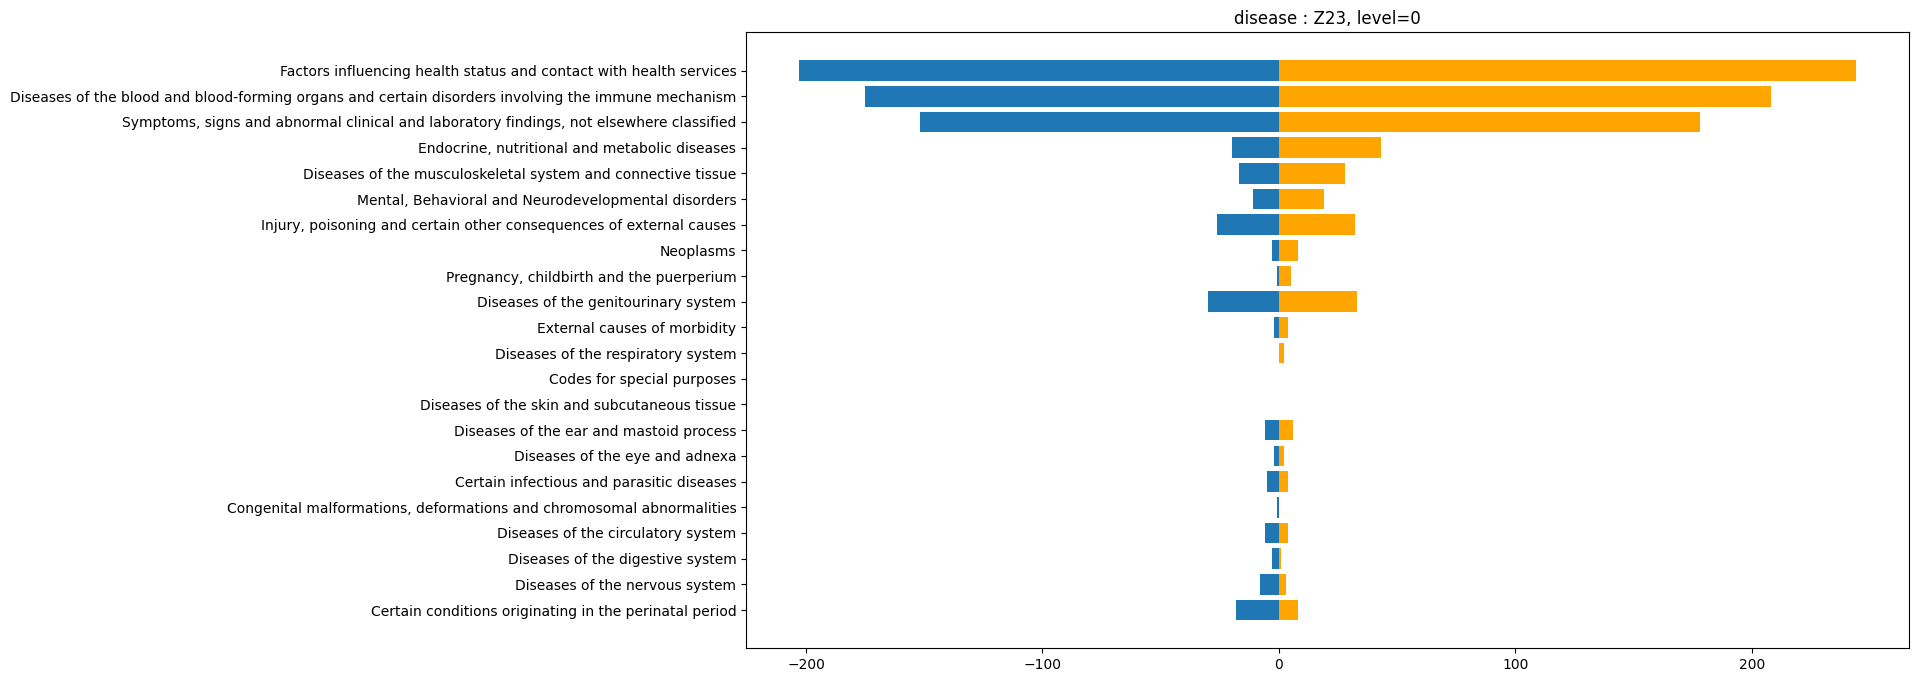

In [156]:
disease_count_plot2(data, prev_icd='Z23', forward_years=1, backward_years=3, level_number=0) #잘됨 #level 0

Y929     317
D649     267
N179     266
Z66      207
Z7902    207
        ... 
P948       1
Q308       1
Q644       1
J4531      1
M6250      1
Name: icd_code, Length: 4500, dtype: int64
I10        765
E785       751
K219       588
Z87891     584
F329       522
          ... 
O9A213       1
F14188       1
V274XXA      1
S82002B      1
7836         1
Name: icd_code, Length: 7506, dtype: int64
전체 계산복잡도 :  1282500


<ipython-input-152-a4d1e335bb38>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_copy['cnt'].iloc[i] += res['count'].iloc[j]


이 메소드 처리하는데 걸린시간 : 45.04343223571777
전체 계산복잡도 :  2139210
이 메소드 처리하는데 걸린시간 : 88.69888162612915
    index  disease                                           describe  \
0     280  Z66-Z66                          Do not resuscitate status   
1     105  I60-I69                           Cerebrovascular diseases   
2     268  Y83-Y84  Surgical and other medical procedures as the c...   
3     186  P70-P74  Transitory endocrine and metabolic disorders s...   
4     103  I26-I28  Pulmonary heart disease and diseases of pulmon...   
5     137  L76-L76  Intraoperative and postprocedural complication...   
6     211  R80-R82  Abnormal findings on examination of urine, wit...   
7     278  Z40-Z53          Encounters for other specific health care   
8     188  P80-P83  Conditions involving the integument and temper...   
9     283  Z69-Z76  Persons encountering health services in other ...   
10     52  E15-E16  Other disorders of glucose regulation and panc...   
11    237  T80-T88  Complicati

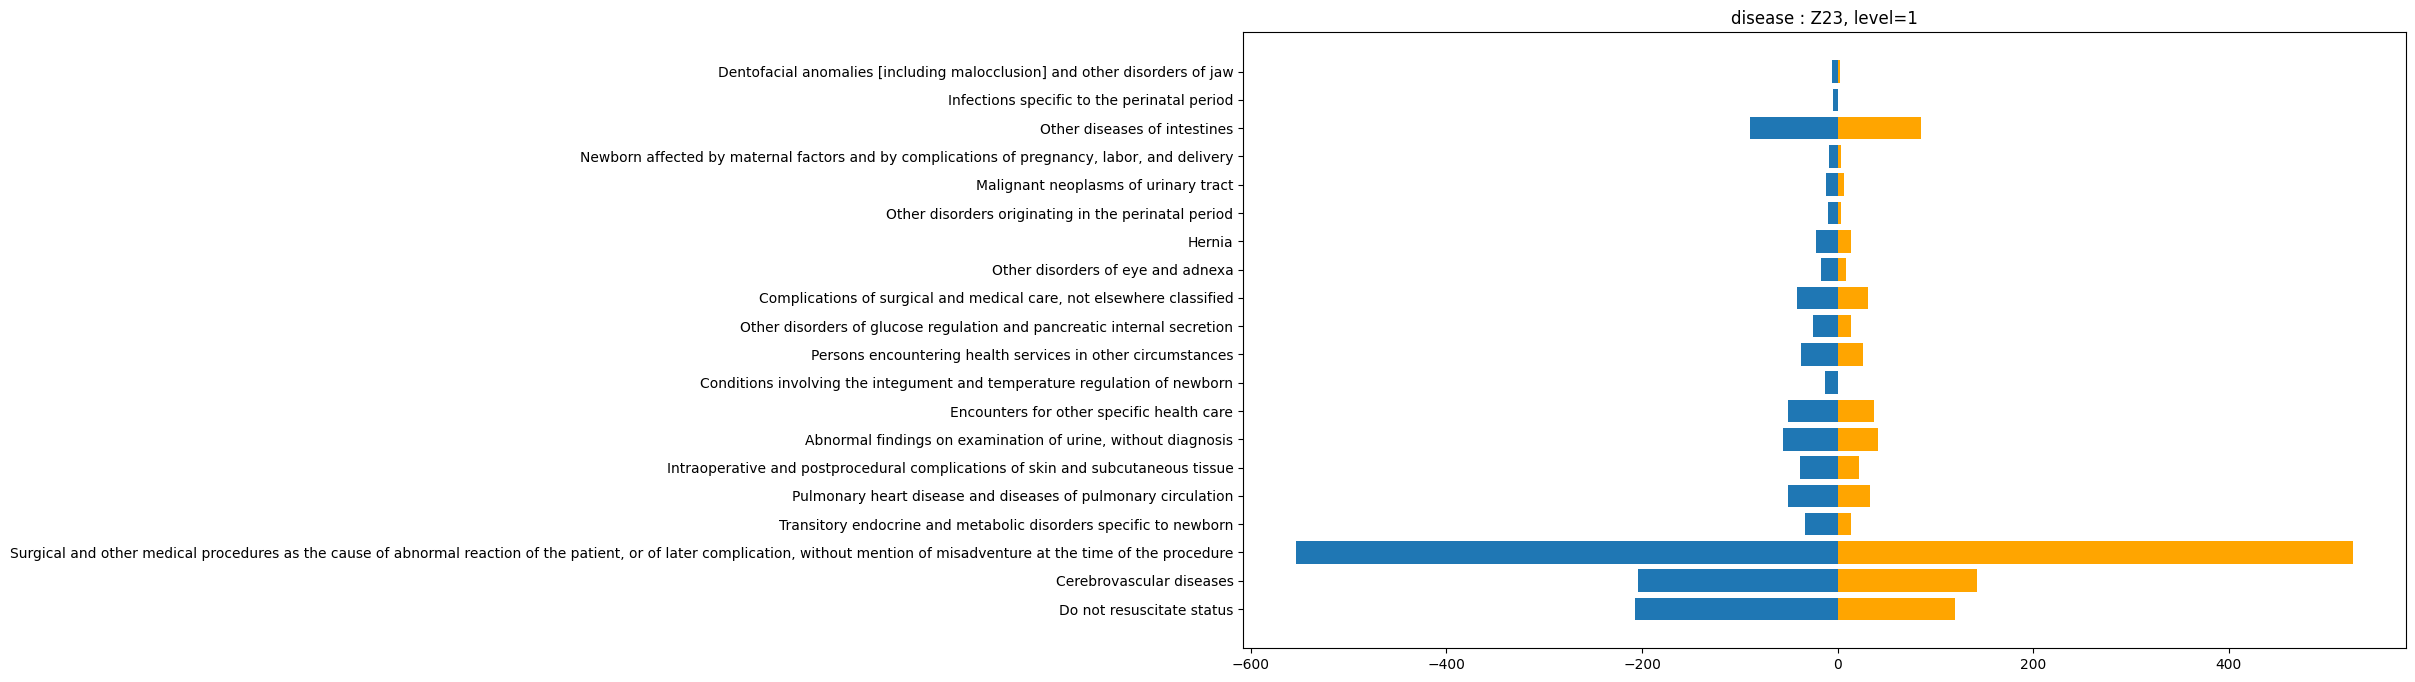

In [157]:
disease_count_plot2(data, prev_icd='Z23', forward_years=1, backward_years=3, level_number=1) #잘됨

Y929     317
D649     267
N179     266
Z66      207
Z7902    207
        ... 
P948       1
Q308       1
Q644       1
J4531      1
M6250      1
Name: icd_code, Length: 4500, dtype: int64
I10        765
E785       751
K219       588
Z87891     584
F329       522
          ... 
O9A213       1
F14188       1
V274XXA      1
S82002B      1
7836         1
Name: icd_code, Length: 7506, dtype: int64


  0%|          | 0/95528 [00:00<?, ?it/s]<ipython-input-153-6d358c0e3e3e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_copy['cnt'].iloc[i] = startwith_res['count'].sum() #c71 안에 c718 x719
100%|██████████| 95528/95528 [05:13<00:00, 305.00it/s]


이 메소드 처리하는데 걸린시간 : 313.2268626689911


100%|██████████| 95528/95528 [07:41<00:00, 206.92it/s]


이 메소드 처리하는데 걸린시간 : 461.66873002052307
    index disease                                           describe  count_1  \
0   28000     P59  other from jaundice and causes Neonatal unspec...      152   
1   94530     Z51     for other care aftercare and medical Encounter      160   
2   94535    Z515                      palliative Encounter care for      139   
3   28008    P599                     unspecified Neonatal jaundice,      115   
4   94710     Z66                                 resuscitate not Do      207   
5   81651     T81  elsewhere not of procedures, classified Compli...      175   
6   11663     I69                cerebrovascular of Sequelae disease      197   
7   81973     T82  of prosthetic devices, and grafts prosth dev/g...      149   
8   94729    Z682                 Body mass 20-29, index [BMI] adult      247   
9    6726     G93                           Other brain of disorders      169   
10  83254     T85  internal other of prosthetic devices, and graf...   

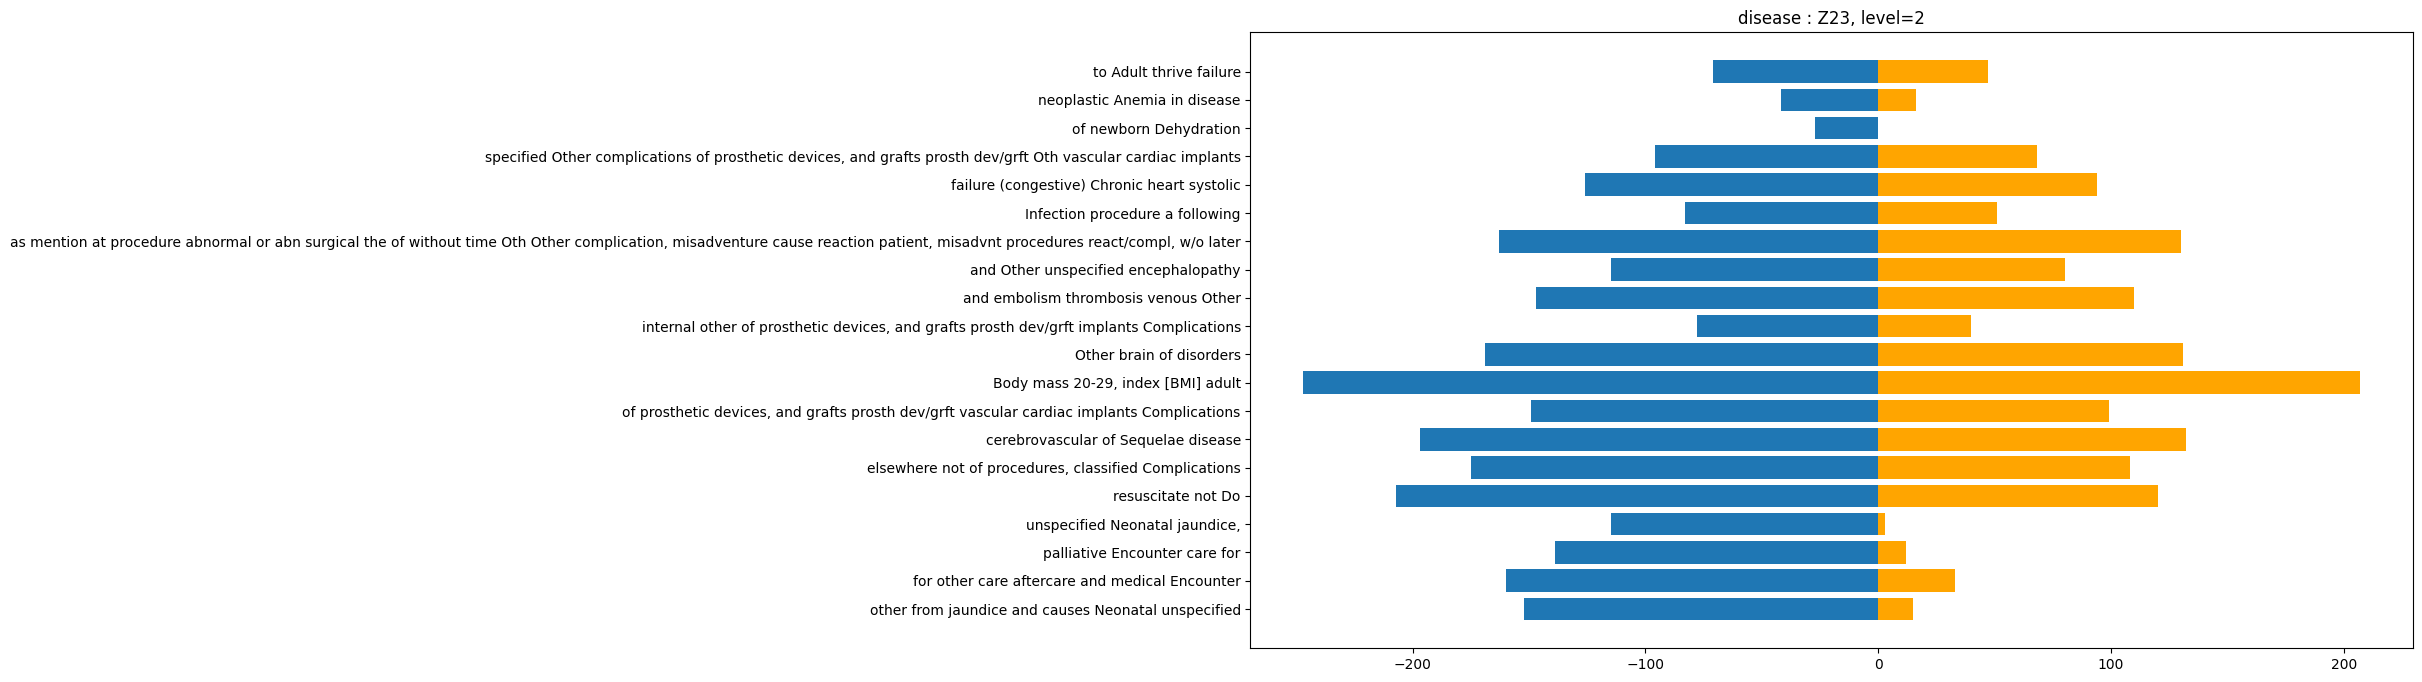

In [158]:
disease_count_plot2(data, prev_icd='Z23', forward_years=1, backward_years=3, level_number=2)

## 빼기?? or 비율??

# y label을 설명으로 바꾸고 plot 제목에 질병이랑 레벨쓰고 차이인데 전에걸린건 의미가없으므로 후에걸린거 - 전에걸린거해서 sort해서 탑10 탑20 이런식으로 시각화하기